<a href="https://colab.research.google.com/github/YS-Saini/Machine_learning_lab/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the pandas library
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the path to your file)
df = pd.read_csv('/content/USA_Housing.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display some basic information about the dataset (like columns, non-null count, and data types)
print("\nDataset Information:")
print(df.info())

# Display summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column               

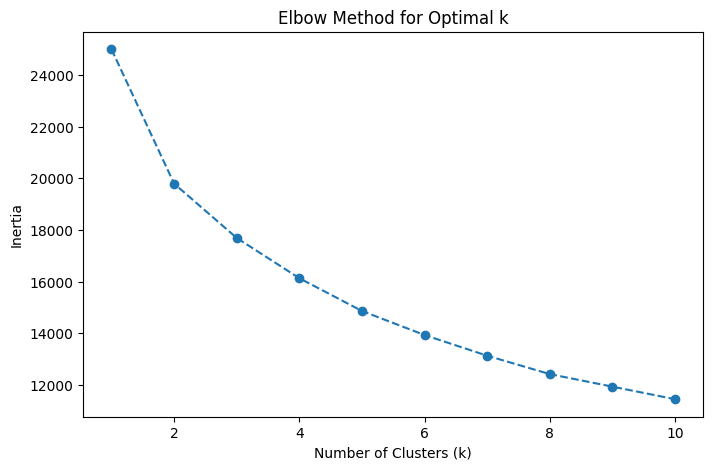

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/USA_Housing.csv')

# Select the first five columns for clustering
data = df.iloc[:, :5].dropna()  # Select first five columns and drop missing values

# Scale the data (important for clustering algorithms)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)  # Testing cluster numbers from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


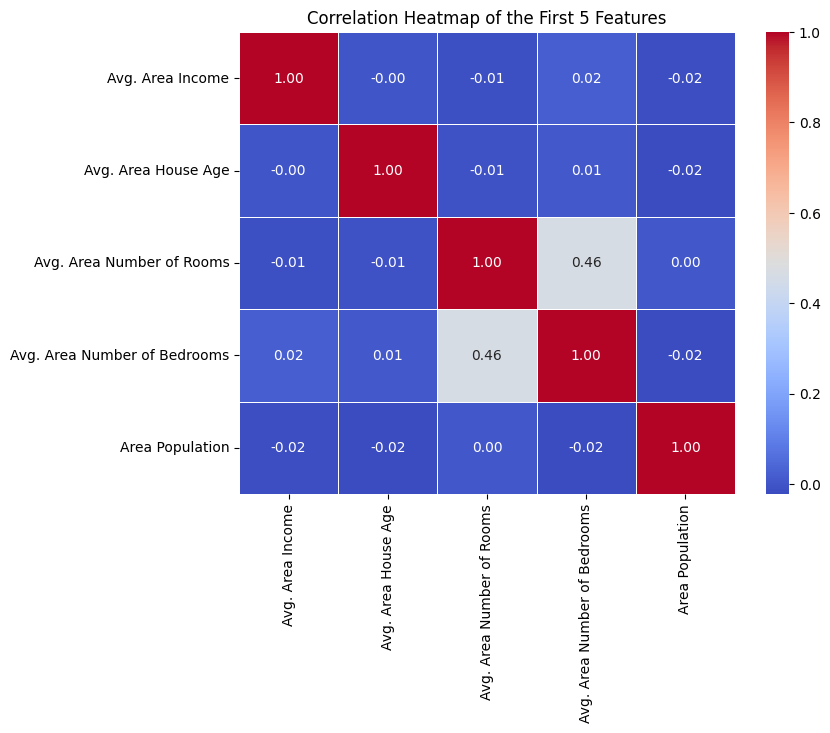

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/USA_Housing.csv')

# Select the first five columns for analysis
data = df.iloc[:, :5]

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of the First 5 Features')
plt.show()


In [5]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/USA_Housing.csv')

# Calculate correlation matrix
corr_matrix = df.corr()

# Select features with high correlation
print(corr_matrix)


                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

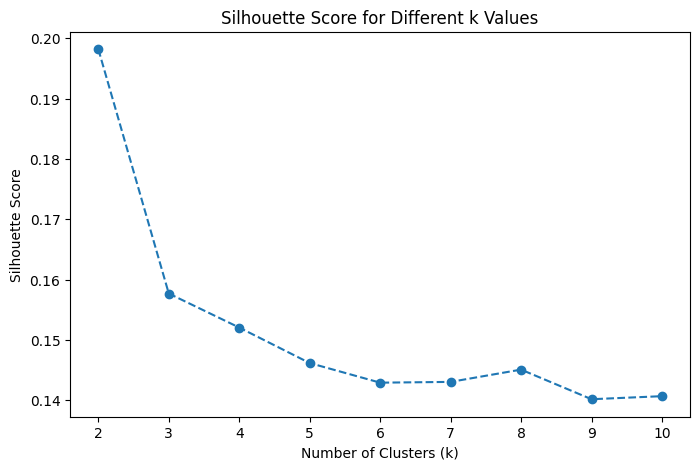

The optimal number of clusters (k) is: 2


In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/USA_Housing.csv')

# Select the first five columns for analysis
data = df.iloc[:, :5]

# Scale the data (important for clustering algorithms)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# List to store silhouette scores
silhouette_scores = []
k_range = range(2, 11)  # Testing cluster numbers from 2 to 10

# Compare silhouette scores for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)

    # Calculate silhouette score for the current k
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores for each value of k
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.show()

# Find the optimal k (highest silhouette score)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f'The optimal number of clusters (k) is: {optimal_k}')


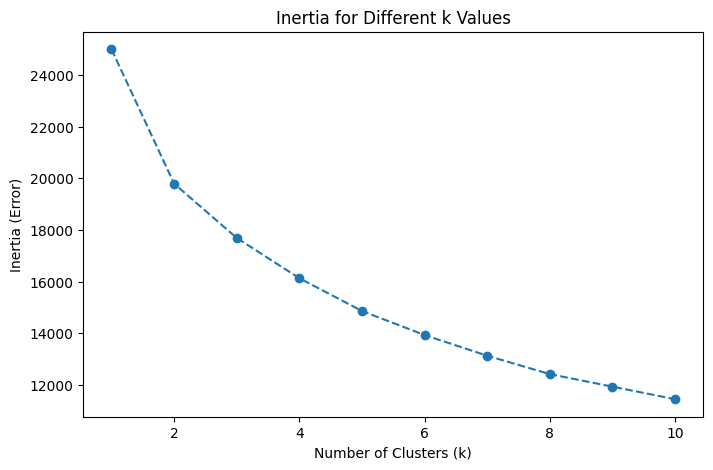

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/USA_Housing.csv')

# Select the first five columns for analysis
data = df.iloc[:, :5]

# Scale the data (important for clustering algorithms)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# List to store inertia values
inertia_values = []
k_range = range(1, 11)  # Testing cluster numbers from 1 to 10

# Compute inertia for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)

    # Record inertia (error)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Error)')
plt.title('Inertia for Different k Values')
plt.show()
